In [1]:
from elasticsearch import Elasticsearch

# Connect to Elasticsearch
es = Elasticsearch(hosts=["http://localhost:9200"], request_timeout=1000)

# Check if Elasticsearch is reachable
if es.ping():
    print("Connected to Elasticsearch")
else:
    print("Failed to connect to Elasticsearch")
    exit(1)

Connected to Elasticsearch


In [11]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Load the data file
file_path = "documents.txt"  # Replace with the actual file path if needed

def load_documents(file_path):
    with open(file_path, 'r') as file:
        documents = file.readlines()
    # Clean up and preprocess the documents
    documents = [line.strip().split(':', 1)[-1] for line in documents if ':' in line]
    return documents

In [92]:
vocab_file = "vocabulary.txt"

def load_vocabulary(file_path):
    with open(file_path, 'r') as file:
        vocabulary = file.readlines()
    vocabulary = [line.strip() for line in vocabulary]
    vocabulary = {item.split()[0]: int(item.split()[1]) for item in vocabulary}
    return vocabulary

# Load the vocabulary
vocabulary = load_vocabulary(vocab_file)
vocabulary = dict(sorted(vocabulary.items(), key=lambda x: x[1], reverse=True))
# get top 5 and bottom 5 words
bottom5 = list(vocabulary.items())[-20:]
print(len(vocabulary))
print(bottom5)

254
[('account', 782), ('self', 780), ('boundari', 776), ('posit', 774), ('separ', 771), ('inform', 769), ('fermion', 767), ('analyz', 765), ('compon', 765), ('along', 760), ('follow', 750), ('invari', 750), ('enhanc', 748), ('aris', 744), ('degre', 743), ('report', 741), ('simpl', 736), ('relev', 728), ('could', 725), ('ratio', 725)]


Total Documents in Vocabulary: 8181
Word Percentages (Sample): [('base', 26.42708715315976), ('coupl', 26.365969930326365), ('dynam', 26.35374648575969), ('all', 25.3636474758587), ('scale', 25.009167583425008), ('obtain', 24.972497249724974), ('here', 24.654687690991324), ('calcul', 24.605793912724604), ('general', 24.593570468157928), ('other', 24.520229800757853)]
Mean Document Occurence Percentage: 14.899753317413982
Variance in Document Occurence: 22.321065722665114


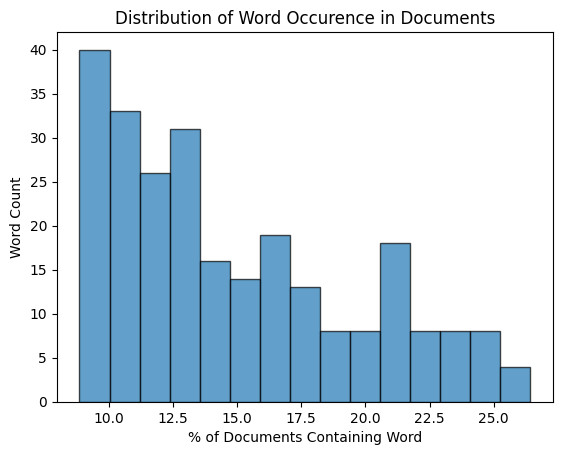

In [94]:
# Calculate word percentages based on vocabulary counts
total_documents = len(documents)
word_percentages = {word: (count / total_documents) * 100 for word, count in vocabulary.items()}

# Display results
print(f"Total Documents in Vocabulary: {total_documents}")
print(f"Word Percentages (Sample): {list(word_percentages.items())[:10]}")
print(f"Mean Document Occurence Percentage: {np.mean(list(word_percentages.values()))}")
print(f"Variance in Document Occurence: {np.var(list(word_percentages.values()))}")

# Plot the distribution
percentages = list(word_percentages.values())
plt.hist(percentages, bins=15, alpha=0.7, edgecolor='black')
plt.title("Distribution of Word Occurence in Documents")
plt.xlabel("% of Documents Containing Word")
plt.ylabel("Word Count")
plt.show()

In [140]:
mean = []
variance = []
meant = []

In [176]:
# read the time file in results directory and get the time for each iteration
time_file = "results/time.txt"
with open(time_file, 'r') as file:
    lines = file.readlines()
lines = [item.strip() for item in lines]
# create a list of times
times = [float(item.split()[1]) for item in lines][-4:]
# mean
mean_time = np.mean(times)
meant.append(mean_time)
# variance
variance_time = np.var(times)
variance.append(variance_time)
print(f"Mean Time: {mean_time}")
print(f"Variance Time: {variance_time}")

Mean Time: 1.273933231830597
Variance Time: 0.0006141114452127283


In [187]:
meant

[np.float64(1.7698809504508972),
 np.float64(1.431725263595581),
 np.float64(1.34818128824234),
 np.float64(1.273933231830597),
 np.float64(1.563352882862091),
 np.float64(1.6456413269042969)]

In [153]:
mean

[np.float64(2.567870855331421),
 np.float64(1.9534531235694885),
 np.float64(1.7641554474830627),
 np.float64(1.6573749780654907),
 np.float64(1.8536361455917358),
 np.float64(1.9436012506484985)]

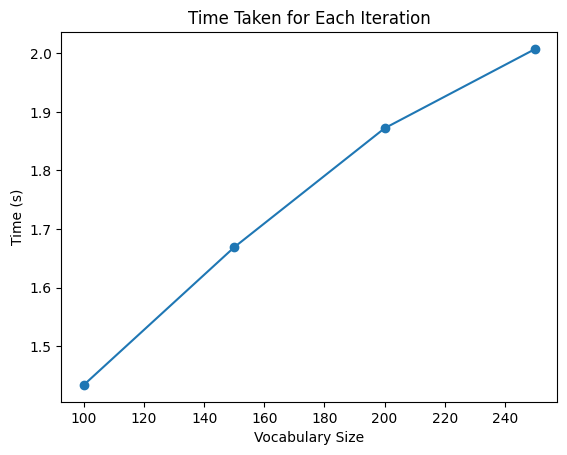

In [116]:
# plot the time taken for each iteration and use variance as error bars
vocabulary_size = [100, 150, 200, 250]
plt.errorbar(vocabulary_size, mean, yerr=variance, fmt='-o')
plt.title("Time Taken for Each Iteration")
plt.xlabel("Vocabulary Size")
plt.ylabel("Time (s)")
plt.show()

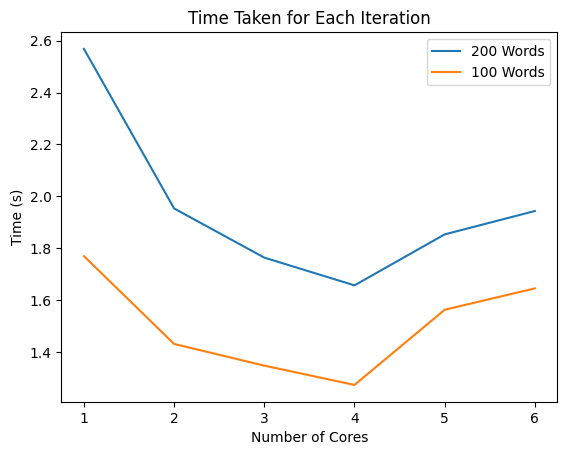

In [188]:
# plot the mean and meant time against the number of cores
num_cores = [1, 2, 3, 4, 5, 6]
plt.plot(num_cores, mean, label="200 Words")
plt.plot(num_cores, meant, label="100 Words")
plt.title("Time Taken for Each Iteration")
plt.xlabel("Number of Cores")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

In [219]:
import re
new_lines = []
clusters_file = "results/prototypes/prototypes5.txt"
with open(clusters_file, 'r') as file:
    lines = file.readlines()
lines = [item.strip() for item in lines]
lines = [item.split(":")[1] for item in lines]
#lines = [[item for item in sublist if item.isalpha()][:5] for sublist in lines]
lines = [item.split(" ")[:5] for item in lines]
result = []
for sublist in lines:
    transformed_sublist = [f"{item.split('+')[0]} ({round(float(item.split('+')[1]), 3)})" for item in sublist]
    result.append(transformed_sublist)
print("Top 5 words in each cluster (12 clusters)")
for i, line in enumerate(result):
    print(f"Cluster {i+1}: {line}")

Top 5 words in each cluster (12 clusters)
Cluster 1: ['temperatur (0.728)', 'magnet (0.549)', 'calcul (0.531)', 'increas (0.522)', 'spin (0.418)']
Cluster 2: ['mass (0.732)', 'coupl (0.542)', 'scale (0.507)', 'matter (0.496)', 'standard (0.445)']
Cluster 3: ['equat (0.646)', 'general (0.566)', 'deriv (0.512)', 'case (0.483)', 'solut (0.432)']
Cluster 4: ['dynam (0.626)', 'approach (0.408)', 'correl (0.38)', 'mani (0.364)', 'local (0.361)']
Cluster 5: ['data (0.641)', 'experiment (0.56)', 'calcul (0.526)', 'predict (0.506)', 'base (0.463)']
Cluster 6: ['physic (0.492)', 'new (0.486)', 'measur (0.471)', 'possibl (0.421)', 'other (0.388)']
Cluster 7: ['numer (0.501)', 'scale (0.488)', 'finit (0.41)', 'simul (0.406)', 'number (0.397)']
Cluster 8: ['electron (0.642)', 'materi (0.506)', 'here (0.502)', 'magnet (0.475)', 'spin (0.435)']
Cluster 9: ['process (0.531)', 'materi (0.49)', 'mechan (0.48)', 'surfac (0.446)', 'increas (0.429)']
Cluster 10: ['while (0.781)', 'those (0.484)', 'charg (0